<a href="https://colab.research.google.com/github/bidyashreenayak0211/Movie-Recomendation-System-using-Machine-Learning-System/blob/main/Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import ipywidgets as widgets
from IPython.display import display

## Read Data

In [52]:
df = pd.read_csv("/content/dataset.csv")

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   title              10000 non-null  object 
 2   genre              9997 non-null   object 
 3   original_language  10000 non-null  object 
 4   overview           9987 non-null   object 
 5   popularity         10000 non-null  float64
 6   release_date       10000 non-null  object 
 7   vote_average       10000 non-null  float64
 8   vote_count         10000 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 703.3+ KB


## Data Cleaning

In [54]:
df.dropna(subset=['genre', 'overview'], inplace=True)
df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year


In [55]:
df['genre'] = df['genre'].apply(lambda x: x.split(',') if isinstance(x, str) else [])

## TF-IDF Vectorization

In [56]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['overview'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

## Building Recomendation System

In [57]:
def recommend_movies(title, num_recommendations=5):
    idx = df[df['title'].str.lower() == title.lower()].index
    if len(idx) == 0:
        return "Movie not found. Try another title."
    idx = idx[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:num_recommendations+1]
    movie_indices = [i[0] for i in sim_scores]
    return df.iloc[movie_indices][['title', 'genre', 'release_year']]


## Interactive widget for recommendations

In [59]:
def on_movie_selection(change):
    movie_title = change['new']
    display(recommend_movies(movie_title))

movie_dropdown = widgets.Dropdown(
    options=df['title'].unique(),
    description='Movie:',
    continuous_update=False
)
movie_dropdown.observe(on_movie_selection, names='value')
display(movie_dropdown)

Dropdown(description='Movie:', options=('The Shawshank Redemption', 'Dilwale Dulhania Le Jayenge', 'The Godfat…

,title,genre,release_year
263,The Sting,"[Comedy, Crime, Drama]",1973
5096,Sliding Doors,"[Comedy, Drama, Fantasy, Romance]",1998
4332,First Love,"[Crime, Action, Comedy, Thriller]",2019
3235,As Tears Go By,"[Drama, Crime, Romance]",1988
7312,Kill Your Friends,"[Comedy, Crime, Thriller]",2015


## Interactive Plot - Genre Distribution

In [67]:
genre_counts = df.explode('genre')['genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']
fig = px.bar(genre_counts, x='Genre', y='Count', title='Movie Genre Distribution', width=1000, height=500)
fig.show()

## WordCloud for Most Common Words in Overviews

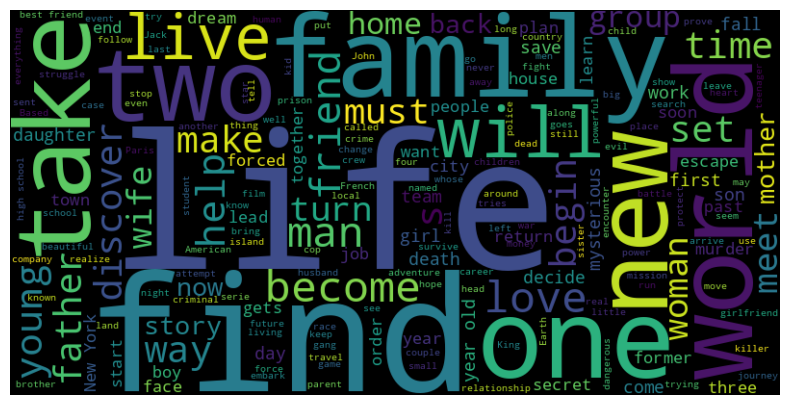

In [64]:
text = " ".join(df['overview'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
